#An analysis of paleo-present climate data

An analysis of paleo-present climate data
  - Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
  - Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
  - Examine Irish context:
    - Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)
  - Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats
  - For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).
  - Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue
  - Comment on accelerated warming based on very latest features (e.g. temperature

The European Project for Ice Coring in Antartica Dome ice core (EPICA) is a project that has been reconstructing the cliamte and atmospheric record going back 800,000 years (kyr).[[1]](https://agupubs.onlinelibrary.wiley.com/doi/pdfdirect/10.1002/2014GL061957).

This was achieved by drilling and extracting ice cores and measuring the levels of certain atmospheric molecules such as Carbon Dioxide (CO2), Methane (CH4) and deuterium which can be used as a proxy for temperature. The deeper you drill the further back in time you are looking. 

Two stations were set up in Concordia Station at Dome C and Kohnen Station Antartica. The drilling process began in 2004. They were able to obtain core samples at 3270.2m deep. At this depth the samples date back 800kyr.

There have been many other similar projects such as at Vostok station [[2]](https://www.ncei.noaa.gov/access/paleo-search/study/2443), a Russian research station in Antartica. Here they obtained samples dating back 420kyr.

By examining the levels of greenhouse gases in the samples they were able to show how the atmosphere changes over timee. As deuterium can be used as an indicator for temperature, they have been able to plot the levels of Co2 and other greenhouse gases against the temperature at the time. This allows an examination of any correlation that occurs between them. 

![graph showing relationship between greenhouse gases and temperature](https://www.e-education.psu.edu/geog3/sites/www.e-education.psu.edu.geog3/files/Mod6/Co2-temperature-records.png)



In 1958 at the Mauna Loa Observatory in Hawaii, C. David Keeling began recording CO2 levels in the air. They produce a monthly mean carbon dioxide level report. It is the longest record of direct measurements of Co2 in the atmosphere.

they also track CH4 and N20 levels. 

https://gml.noaa.gov/ccgg/trends/data.html

unc = levels of uncertainty

reading
https://www.e-education.psu.edu/geog3/sites/www.e-education.psu.edu.geog3/files/Mod6/Co2-temperature-records.png
#
https://rpubs.com/gregory_halverson/mauna_loa

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



On the EPA website I found a database that has amalgamated the results from previous studies (EPICA Dome C, Vostok, Siple Station, Antarctica, Mauna Loa, Hawaii, Barrow, Alaska, Cape Matatula,  American Samoa, South Pole, Antarctica, Cape Grim, Australia, Lampedusa Island, Italy, Shetland Islands, Scotland) of Co2 atmosphere levels going back to 800kyr. The most recent datapoints were from 2015. As the Mauna Loa data is updated yearly I added 2016-2022 to the spreadsheet myself. 


As there are a number of overlaps between different studies, in cases where there are multiple values I will attempt to obtain an average value for that year. 


 )

In [13]:
#reading in the dataset

carbon_dio = pd.read_csv('ghg-concentrations_fig-1.csv', skiprows=6,) #the data we want begins on line 7

In [14]:
carbon_dio.head()

,Year,"EPICA and Vostok Station, Antarctica","Law Dome, Antarctica (75-year smoothed)","Siple Station, Antarctica","Mauna Loa, Hawaii","Barrow, Alaska","Cape Matatula, American Samoa","South Pole, Antarctica","Cape Grim, Australia","Lampedusa Island, Italy","Shetland Islands, Scotland"
0,Ice Core Measurements,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-796562,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-795149,188.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-794517,189.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-793252,195.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# I want to remove the first row as it has no relevant values.

co2 = carbon_dio.drop(0)
co2.head()

,Year,"EPICA and Vostok Station, Antarctica","Law Dome, Antarctica (75-year smoothed)","Siple Station, Antarctica","Mauna Loa, Hawaii","Barrow, Alaska","Cape Matatula, American Samoa","South Pole, Antarctica","Cape Grim, Australia","Lampedusa Island, Italy","Shetland Islands, Scotland"
1,-796562,191.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-795149,188.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-794517,189.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-793252,195.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-792658,199.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Create a new column that averages the others


co2['Average'] = co2[['EPICA and  Vostok Station,  Antarctica',	'Law Dome, Antarctica (75-year smoothed)',	'Siple Station, Antarctica',	'Mauna Loa, Hawaii',	'Barrow, Alaska',	'Cape Matatula,  American Samoa',	'South Pole, Antarctica',	'Cape Grim, Australia',	'Lampedusa Island, Italy',	'Shetland Islands, Scotland',	
]].mean(axis=1)

In [17]:
co2.tail(10)

,Year,"EPICA and Vostok Station, Antarctica","Law Dome, Antarctica (75-year smoothed)","Siple Station, Antarctica","Mauna Loa, Hawaii","Barrow, Alaska","Cape Matatula, American Samoa","South Pole, Antarctica","Cape Grim, Australia","Lampedusa Island, Italy","Shetland Islands, Scotland",Average
1357,2013,NaN,NaN,NaN,396.48,397.956667,394.3200,392.806667,NaN,NaN,NaN,395.390833
1358,2014,NaN,NaN,NaN,398.61,399.851667,396.1375,394.822500,NaN,NaN,NaN,397.355417
1359,2015,NaN,NaN,NaN,400.83,NaN,NaN,NaN,NaN,NaN,NaN,400.830000
1360,2016,NaN,NaN,NaN,404.41,NaN,NaN,NaN,NaN,NaN,NaN,404.410000
1361,2017,NaN,NaN,NaN,406.76,NaN,NaN,NaN,NaN,NaN,NaN,406.760000
1362,2018,NaN,NaN,NaN,408.72,NaN,NaN,NaN,NaN,NaN,NaN,408.720000
1363,2019,NaN,NaN,NaN,411.65,NaN,NaN,NaN,NaN,NaN,NaN,411.650000
1364,2020,NaN,NaN,NaN,414.21,NaN,NaN,NaN,NaN,NaN,NaN,414.210000
1365,2021,NaN,NaN,NaN,416.41,NaN,NaN,NaN,NaN,NaN,NaN,416.410000
1366,2022,NaN,NaN,NaN,418.53,NaN,NaN,NaN,NaN,NaN,NaN,418.530000


In [31]:

co2['Year'] = co2['Year'].astype(int)
co2['Year'].describe

<bound method NDFrame.describe of 1      -796562
2      -795149
3      -794517
4      -793252
5      -792658
         ...  
1362      2018
1363      2019
1364      2020
1365      2021
1366      2022
Name: Year, Length: 1366, dtype: int32>

Text(0.5, 0, 'Years, from 800kyr to 2022')

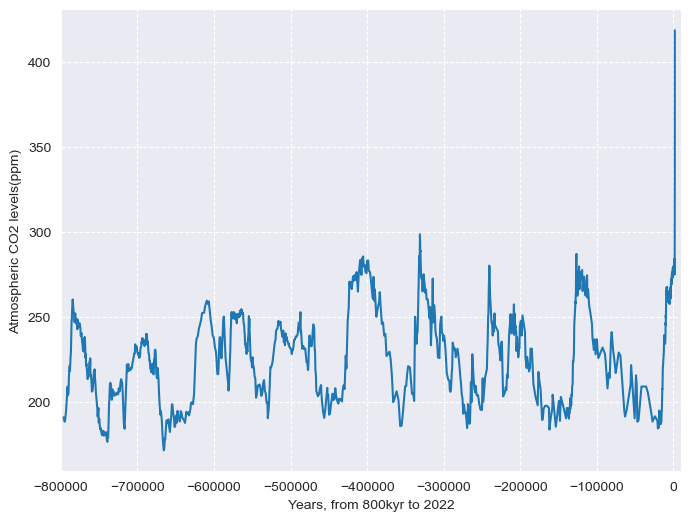

In [64]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed

sns.lineplot(co2, x = "Year", y = "Average",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})
plt.xlim(-800000, 10000) # went to 10000 to allow us to see the values in the present day
plt.ylabel('Atmospheric CO2 levels(ppm)')
plt.xlabel('Years, from 800kyr to 2022')


In [72]:
new_temp = pd.read_csv('New temp data.csv')

In [73]:
new_temp.head()

,Year,deutfinal,temp,acc-EDC3beta,Adjusted years,deutfinal.1,temp.1
0,-55.000000,NaN,218.3,3.105321,2005.000000,NaN,218.3
1,-50.513333,NaN,218.3,3.104805,2000.513333,NaN,218.3
2,-46.026667,NaN,218.3,3.104404,1996.026667,NaN,218.3
3,-41.540000,NaN,218.3,3.104025,1991.540000,NaN,218.3
4,-34.516667,NaN,218.3,3.103453,1984.516667,NaN,218.3


In [74]:
#extract just the last 3 columns we need

temps = new_temp.iloc[:,-3:] 

In [75]:
temps.head()

,Adjusted years,deutfinal.1,temp.1
0,2005.000000,NaN,218.3
1,2000.513333,NaN,218.3
2,1996.026667,NaN,218.3
3,1991.540000,NaN,218.3
4,1984.516667,NaN,218.3


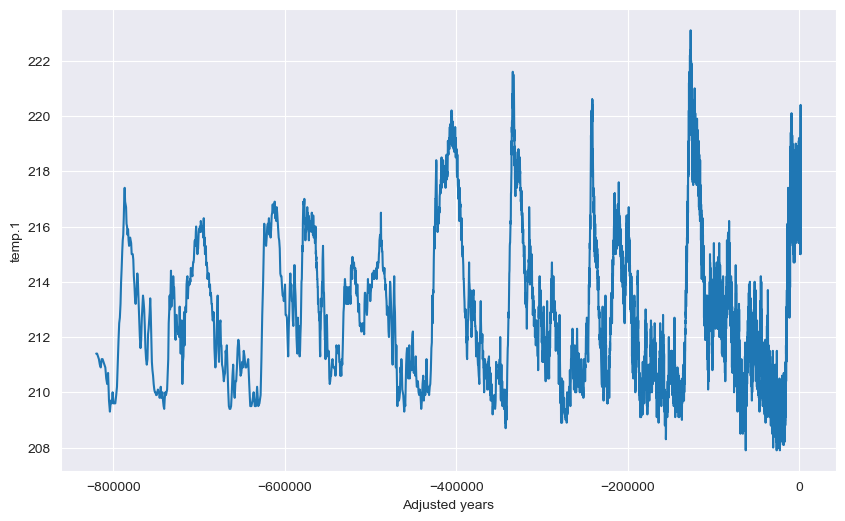

In [82]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.lineplot(temps, x = "Adjusted years", y = "temp.1",)
sns.set_style("darkgrid" , {"ytick.major.size": 10 , "ytick.minor.size": 2 , 'grid.linestyle': '--'})

#plt.scatter(temps['Adjusted years'], temps['temp.1'], s=10 )
#plt.gca().invert_xaxis() # reversing x axis so 2023 is furthest to the right
plt.grid(True)

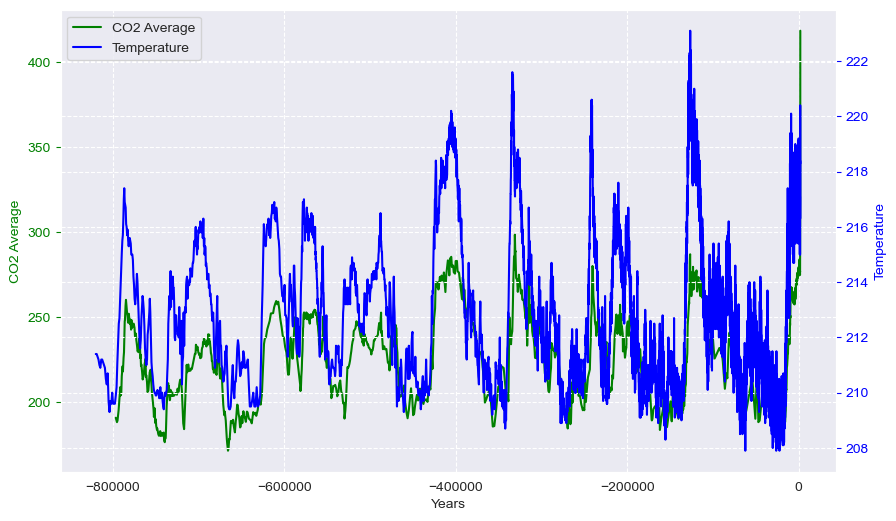

In [95]:
# Plot both XO2 and temp on the same plot with two y axis

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the first dataset on the primary y-axis (left)
ax1.plot(co2['Year'], co2['Average'], "g-", label= "CO2 Average")
ax1.set_xlabel('Years')
ax1.set_ylabel('CO2 Average', color='g')
ax1.tick_params('y', colors='g')

# Creating a secondary y-axis (right)
ax2 = ax1.twinx()

# Plotting the second dataset on the secondary y-axis (right)
ax2.plot(temps['Adjusted years'], temps['temp.1'], 'b-', label='Temperature')
ax2.set_ylabel('Temperature', color='b')
ax2.tick_params('y', colors='b')

# Displaying legends for both datasets
#lines_1, labels_1 = ax1.get_legend_handles_labels()
#lines_2, labels_2 = ax2.get_legend_handles_labels()
#lines = lines_1 + lines_2
#labels = labels_1 + labels_2
plt.legend(lines, labels, loc='upper left')